# k近邻算法

KNN是通过测量不同特征值之间的距离进行分类。它的思路是：如果一个样本在特征空间中的k个最相似(即特征空间中最邻近)的样本中的大多数属于某一个类别，则该样本也属于这个类别，其中K通常是不大于20的整数。KNN算法中，所选择的邻居都是已经正确分类的对象。该方法在定类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_x = [[3.393533211, 2.331273381], 
              [3.110073483, 1.781539638], 
              [1.343808831, 3.368360954], 
              [3.582294042, 4.679179110], 
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [3]:
X_train = np.array(raw_data_x)
Y_train = np.array(raw_data_y)

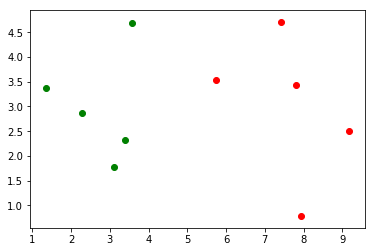

In [4]:
# 展示训练集数据
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1], color='g')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1], color='r')
plt.show()

In [5]:
# 预测数据
x = np.array([8.093607318, 3.365731514])

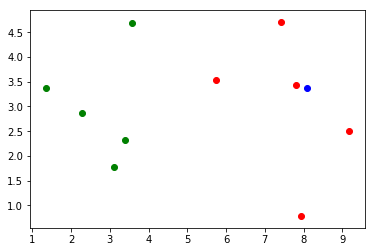

In [6]:
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1], color='g')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

# KNN过程

In [7]:
# 计算距离
from math import sqrt
distances = []
# distances = [sqrt(np.sum((x_train - x)**2)) for x_train in X_train]
for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2))
    distances.append(d)

In [8]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [9]:
# distances数组排序返回索引值
nearest = np.argsort(distances)

In [10]:
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2])

In [11]:
k = 6

In [12]:
# 根据 nearest 在 Y_train 获取最近的值
topK_y = [Y_train[i] for i in nearest[:k]]

In [13]:
# 统计数组中元素个数
from collections import Counter
votes = Counter(topK_y)

In [14]:
predict_y = votes.most_common(1)[0][0]

In [15]:
predict_y

1

# scikit-learn 中的 KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
KNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [18]:
KNN_classifier.fit(X_train, Y_train) # 数据集运用算法拟合(fit)出模型

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [19]:
X_predict = x.reshape(1, -1)

In [20]:
X_predict

array([[ 8.09360732,  3.36573151]])

In [21]:
y_predit = KNN_classifier.predict(X_predict)

In [22]:
y_predit[0]

1

# 仿照scikit-learn 封装knn算法

In [23]:
import numpy as np
from math import sqrt
from collections import Counter

class KNNClassifier:
    def __init__(self, k):
        assert k >= 1, "k must be valid"
        self.k = k
        self._X_train = None
        self._y_train = None
    
    def fit(self, X_train, y_train):
        # 根据训练数据集X_train和y_train训练kNN分类器
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert self.k <= X_train.shape[0], \
            "the size of X_train must be at least k."
        self._X_train = X_train
        self._y_train = y_train
        return self
    
    def predit(self, X_predict):
        # 给定待预测数据集X_predict，返回表示X_predict的结果向量
        assert self._X_train is not None and self._y_train is not None, \
                "must fit before predict!"
        assert X_predict.shape[1] == self._X_train.shape[1], \
                "the feature number of X_predict must be equal to X_train"

        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)
    
    def _predict(self, x):
        # 给定单个待预测数据x，返回x的预测结果值
        assert x.shape[0] == self._X_train.shape[1], \
            "the feature number of x must be equal to X_train"

        distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in self._X_train]
        nearest = np.argsort(distances)

        topK_y = [self._y_train[i] for i in nearest[:self.k]]
        votes = Counter(topK_y)

        return votes.most_common(1)[0][0]
    
    def __repr__(self):
        return "KNN=(k=%d)" % self.k

In [24]:
knn_clf = KNNClassifier(k=6)
knn_clf.fit(X_train, Y_train)

KNN=(k=6)

In [25]:
y_predict = knn_clf.predit(X_predict)

In [26]:
y_predict[0]

1

# 手动测试算法性能

In [27]:
from sklearn import datasets

In [28]:
iris = datasets.load_iris()

In [29]:
X = iris.data
y = iris.target

In [30]:
X.shape

(150, 4)

In [31]:
y.shape

(150,)

In [32]:
# 拆分数据集为训练数据集和测试数据集
shuffle_indexes = np.random.permutation(len(X))
shuffle_indexes

array([ 46,  85,  18,  33, 114, 145, 143,  82,  52,  99,  54,  39,  43,
        50,  87,  65,  49,  44,  27,  86,  19,  80, 118,  47, 107, 127,
        10,  74,   1,  67,  73,  89,  35,  56, 133, 108,  14, 109,  97,
       104,  40,  84,  38,  70,  78,  45, 146,   2, 125,  15,   3,  76,
        61,  26,  60, 142, 138,  53, 116,  96,  22, 147, 119,  93, 148,
       149,  37,   7,  63,  94, 139,  90,  88, 101,  81,  59,  20, 141,
        29,  62,  71,  28, 132, 129, 126,  77,  31,  25,  83,  75,  12,
        92,  21,  51, 144,  91,  30,  69,   4, 122,  98, 106,  36,  41,
         8,  32, 136, 111,  42,  66, 100, 113, 137, 115, 134,  55, 131,
         6,  23,  17,   5, 117,  13, 135,   0,  64,  58,  24, 110, 130,
       121, 128,  79, 123,  11, 124,  95,  16,  57, 120,   9,  72,  68,
       102, 103, 140,  48, 112, 105,  34])

In [33]:
test_ratio = 0.2
test_size = int(len(X) * test_ratio)

In [34]:
test_size

30

In [35]:
test_indexes = shuffle_indexes[:test_size]
train_indexes = shuffle_indexes[test_size:]

In [36]:
X_train_iris = X[train_indexes]
y_train_iris = y[train_indexes]

X_test_iris = X[test_indexes]
y_test_iris = y[test_indexes]

In [37]:
X_train_iris.shape

(120, 4)

In [38]:
my_knn_clf = KNNClassifier(k=6)
my_knn_clf.fit(X_train_iris, y_train_iris)

KNN=(k=6)

In [39]:
y_predict_iris = my_knn_clf.predit(X_test_iris)

In [40]:
sum(y_predict_iris == y_test_iris)

30

In [41]:
sum(y_predict_iris == y_test_iris) / len(y_test_iris)

1.0

# sklearn中train_test_split

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2)

KNN_classifier = KNeighborsClassifier(n_neighbors=6)
KNN_classifier.fit(X_train_1, y_train_1)
y_predit_1 = KNN_classifier.predict(X_test_1)

accuracy = sum(y_predit_1 == y_test_1) / len(y_test_1)
accuracy

1.0